# **Instrument to Instrument (ITI) translation: PROBA2/SWAP-to-SDO/AIA**

## Read The Docs
For more information about the tool and background of the individual case studies see:

[iti-documentation.rtfd.io](https://iti-documentation.readthedocs.io/en/latest/)

The SWAP instrument observes the Sun in the 174 A channel, with a lower resolution compared to the AIA instrument. With ITI we can translate the SWAP observations to AIA observations, providing enhanced spatial resolution with SWAP.

## Installation

In [1]:
!pip install git+https://github.com/spaceml-org/InstrumentToInstrument.git@development
!pip install lightning
!pip install sunpy_soar
!pip install sunpy

  Cloning https://github.com/spaceml-org/InstrumentToInstrument.git (to revision development) to /private/var/folders/tj/7h3lqn950sv5k36g1yyl4vkr0000gn/T/pip-req-build-r1f04mse
  Running command git clone --filter=blob:none --quiet https://github.com/spaceml-org/InstrumentToInstrument.git /private/var/folders/tj/7h3lqn950sv5k36g1yyl4vkr0000gn/T/pip-req-build-r1f04mse
  Running command git checkout -b development --track origin/development
  Switched to a new branch 'development'
  Branch 'development' set up to track remote branch 'development' from 'origin'.
  Resolved https://github.com/spaceml-org/InstrumentToInstrument.git to commit b083c705d463997caebf2df663d8774cbe569eda
  Preparing metadata (setup.py) ... done

[notice] A new release of pip is available: 23.2.1 -> 24.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 24.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1

### Imports

In [10]:
from iti.translate import *
from datetime import datetime
import matplotlib.pyplot as plt
from iti.evaluation.util import download_gcp_bucket
import os
import glob
from iti.download.download_proba2 import PROBA2Downloader
from iti.evaluation.util import getSWAPdata
from tqdm import tqdm

base_path = os.getcwd()

We provide a sample observation from each Instrument. If you want to make use of custom files, use the prep routines and upload your files.

We provide a publicly available dataset which allows the users to play around with a subset of the data available without downloading the entire database.

This dataset contains ``.fits`` files from **PROBA2/SWAP**, **SDO/AIA**, **Solar Orbiter/EUI (FSI and HRI)**, **SOHO/EIT** and **STEREO/EUVI**.

In addition 3 trained models are stored with:
1. PROBA2/SWAP to SDO/AIA
2. Solar Orbiter/EUI FSI to SDO/AIA and
3. SDO/AIA to Solar Orbiter/EUI HRI

to perform the translation.  

In [3]:
download_gcp_bucket('iti-dataset', base_path+'/iti-testset')

Failed to download configs/ due to exception: [Errno 21] Is a directory: '/Users/christophschirninger/PycharmProjects/ITI/examples/iti-testset/configs/'
Downloaded configs/proba2_to_sdo_colab.yaml to /Users/christophschirninger/PycharmProjects/ITI/examples/iti-testsetconfigs/proba2_to_sdo_colab.yaml.
Failed to download models/ due to exception: [Errno 21] Is a directory: '/Users/christophschirninger/PycharmProjects/ITI/examples/iti-testset/models/'
Downloaded models/aia_to_hri_v0_1.pt to /Users/christophschirninger/PycharmProjects/ITI/examples/iti-testsetmodels/aia_to_hri_v0_1.pt.
Downloaded models/fsi_to_aia_v0_3.pt to /Users/christophschirninger/PycharmProjects/ITI/examples/iti-testsetmodels/fsi_to_aia_v0_3.pt.
Downloaded models/swap_to_aia_v0_4.pt to /Users/christophschirninger/PycharmProjects/ITI/examples/iti-testsetmodels/swap_to_aia_v0_4.pt.
Failed to download proba2/174/ due to exception: [Errno 21] Is a directory: '/Users/christophschirninger/PycharmProjects/ITI/examples/iti-te

We can also make use of our built-in downloaders to get the data from the database.

In [6]:
swap_downloader = PROBA2Downloader(base_path=base_path+'/swap')
swap_downloader.downloadDate(date=datetime(2024, 5, 8, 15))

swap_files = sorted(glob.glob('swap/*/*.fits', recursive=True))

['swap/174/2024-05-08T15:00:00.fits']

In the next step we load the ``.fits`` files as SunPy maps. Here we crop the observations to 1.1 solar radii to cover the same Field-of-View (FOV). For SDO/AIA this additionally includes a degradation correction of the instrument.

In [11]:
swap_data = [getSWAPdata(f) for f in tqdm(swap_files)]

  0%|          | 0/1 [00:00<?, ?it/s]INFO:sunpy:Missing metadata for solar radius: assuming the standard radius of the photosphere.
INFO:sunpy:Missing metadata for solar radius: assuming the standard radius of the photosphere.
INFO:sunpy:Missing metadata for solar radius: assuming the standard radius of the photosphere.
INFO:sunpy:Missing metadata for solar radius: assuming the standard radius of the photosphere.


INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


INFO:sunpy:Missing metadata for solar radius: assuming the standard radius of the photosphere.
INFO:sunpy:Missing metadata for solar radius: assuming the standard radius of the photosphere.
INFO:sunpy:Missing metadata for solar radius: assuming the standard radius of the photosphere.
INFO:sunpy:Missing metadata for solar radius: assuming the standard radius of the photosphere.
100%|██████████| 1/1 [00:00<00:00,  1.09it/s]

INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


We initialize the translator and perfrom the translation.

In [9]:
translator = SWAPToAIA(model_name=base_path+'/iti-testset/models/swap_to_aia_v0_4.pt')
iti_swap_maps = list(translator.translate(swap_files))

INFO:sunpy:Missing metadata for solar radius: assuming the standard radius of the photosphere.
INFO:sunpy:Missing metadata for solar radius: assuming the standard radius of the photosphere.


INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Miss

We can now plot the original SWAP observation and the translated ITI observation.

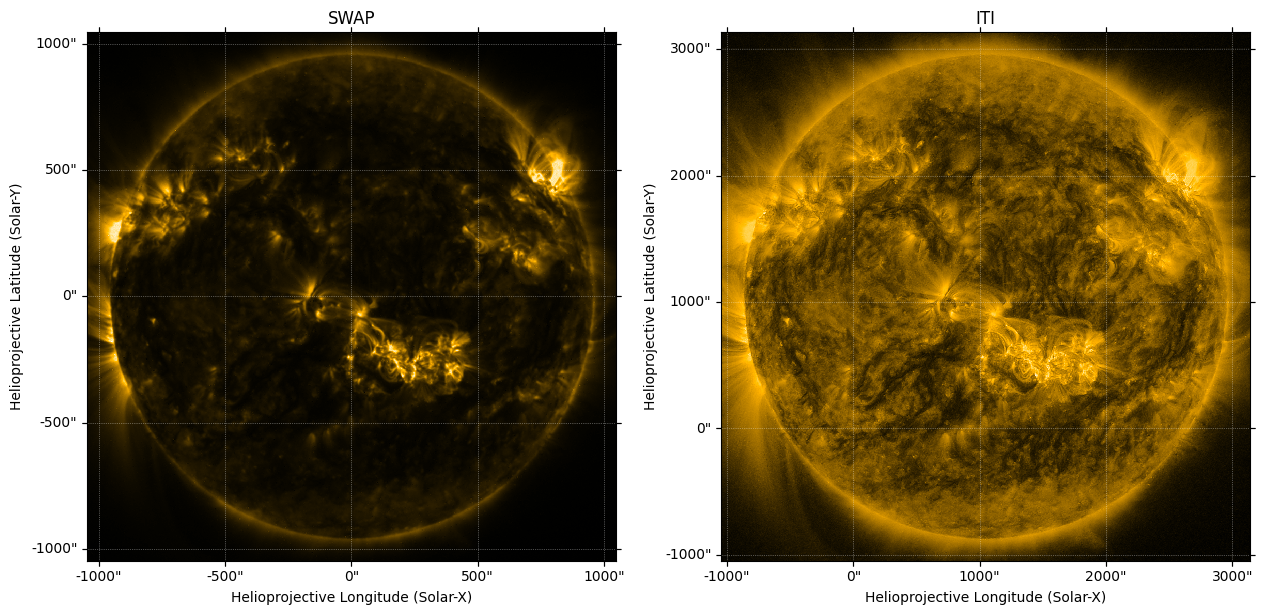

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(15, 15), subplot_kw={'projection': swap_data[0]})
swap_data[0].plot(axes=axs[0], title='SWAP')
iti_swap_maps[0].plot(axes=axs[1], title='ITI')
plt.show()